In [4]:
# !python -m ensurepip

In [5]:
!pip --version

pip 23.1.2 from c:\Users\ntqhuy2k2\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip (python 3.11)



In [6]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install img2table


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
def show_image_in_plt(image):
    # Convert the BGR image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(image)
    plt.show()

In [9]:
paths = ["test{}.jpg".format(i) for i in range(1, 3)]
paths

['test1.jpg', 'test2.jpg']

In [10]:
def show_graph(circles):
    # Tạo danh sách các tọa độ x và y của các vòng tròn
    x_coords = []
    y_coords = []
    for x, y, r in circles:
        x_coords.append(x)
        y_coords.append(y)

    # Vẽ biểu đồ thống kê vị trí của các vòng tròn
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].hist(x_coords, bins=50)
    axs[0].set_title("Histogram of Circle Positions (X-axis)")
    axs[0].set_xlabel("X-coordinate")
    axs[0].set_ylabel("Frequency")
    axs[1].hist(y_coords, bins=50)
    axs[1].set_title("Histogram of Circle Positions (Y-axis)")
    axs[1].set_xlabel("Y-coordinate")
    axs[1].set_ylabel("Frequency")
    plt.show()

In [11]:
def imshow(image):
    # Hiển thị ảnh gốc và ảnh đã tìm thấy các vòng tròn
    cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    cv2.imshow("Image", image)

    # Thay đổi kích thước cửa sổ hiển thị ảnh
    cv2.resizeWindow("Image", 800, 600)

    # Chờ bấm phím bất kỳ để thoát
    cv2.waitKey(0)

    # Giải phóng bộ nhớ
    cv2.destroyAllWindows()

In [12]:
def remove_outliers(data):
    # Tính mean và standard deviation của dữ liệu
    mean = np.mean(data)
    std = np.std(data)

    # Đặt ngưỡng cho Z-score (ví dụ: 3)
    threshold = 3

    # Tìm các điểm ngoại lệ dựa trên Z-score
    outliers = []
    for i in range(len(data)):
        z_score = (data[i] - mean) / std
        if abs(z_score) > threshold:
            outliers.append(i)

    # Loại bỏ các điểm ngoại lệ khỏi dữ liệu
    cleaned_data = np.delete(data, outliers)

    return cleaned_data

In [13]:
def loop(path):
    path = "input/" + path
    print(path)

    # Đọc ảnh
    image = cv2.imread(path, 0)

    # Áp dụng Gaussian Blur để giảm nhiễu
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Dùng Hough Circle Transform để phát hiện các vòng tròn
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        1,
        20,
        param1=50,
        param2=30,
        minRadius=1,
        maxRadius=20,
    )

    x_start = image.shape[1]
    y_start = image.shape[0]
    x_end = 0
    y_end = 0

    print(x_start, y_start, x_end, y_end)

    # Nếu tìm thấy các vòng tròn
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")

        # Vẽ các vòng tròn đã tìm thấy lên ảnh gốc
        for x, y, r in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)

            if x > x_end:
                x_end = x
            if x < x_start:
                x_start = x

            if y > y_end:
                y_end = y
            if y < y_start:
                y_start = y
        print(x_start, y_start, x_end, y_end)
        
        cv2.rectangle(image, (x_start, y_start),
                      (x_end, y_end), (0, 255, 0), 2)
        print("output/" + path)
        show_image_in_plt(image)
        # imshow(image)
        cv2.imwrite("output/" + path, image)

        show_graph(circles)

        # Áp dụng phương pháp loại bỏ outliers vào danh sách các giá trị x và y
        x_cleaned = remove_outliers(circles[:, 0])
        y_cleaned = remove_outliers(circles[:, 1])

        # Tạo lại danh sách các vòng tròn từ các giá trị đã được loại bỏ outliers
        circles_cleaned = np.column_stack((x_cleaned, y_cleaned, circles[:, 2]))

        # Hiển thị kết quả sau khi loại bỏ outliers
        show_graph(circles_cleaned)
    else:
        print("Không tìm thấy vòng tròn trong ảnh")

input/test1.jpg
2048 1536 0 0
284 230 1852 1328
output/input/test1.jpg


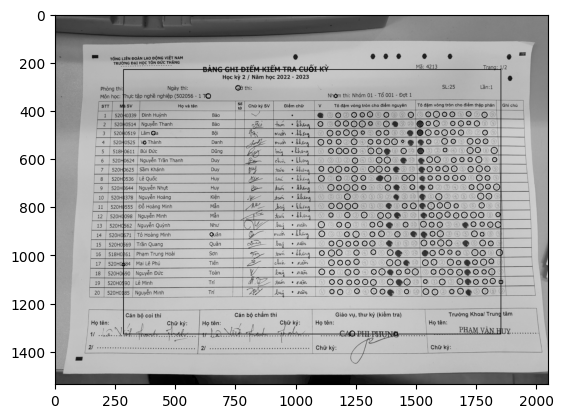

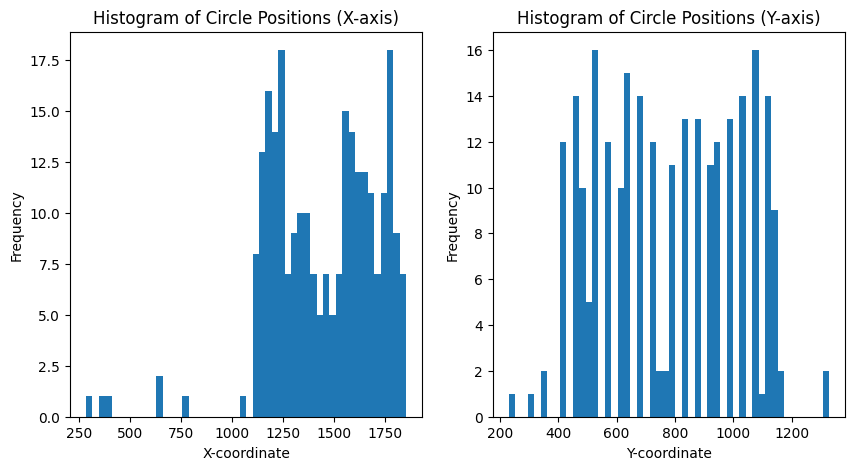

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 255 and the array at index 1 has size 259

In [14]:
for path in paths:
    loop(path)

C:\Users\ntqhuy2k2\AppData\Local\Temp\ipykernel_15192\737210470.py:26: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


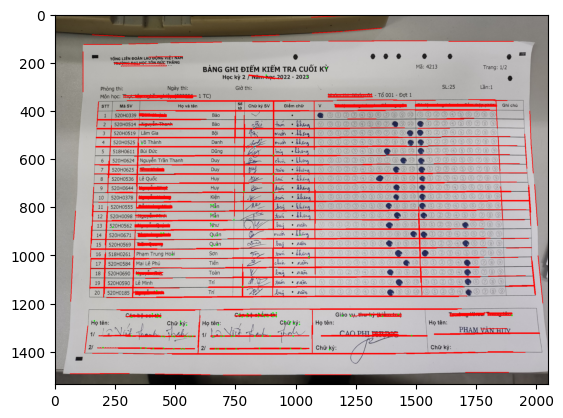

In [15]:
import cv2
import numpy as np

# Đọc ảnh
img = cv2.imread('input/test1.jpg')

# Chuyển sang ảnh xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Áp dụng Gaussian Blur để giảm nhiễu
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Phát hiện các cạnh trong ảnh
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Tìm các đường thẳng trong ảnh
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Vẽ các đường thẳng lên ảnh gốc
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Tìm các góc trong ảnh
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

# Vẽ các góc lên ảnh gốc
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

# Hiển thị ảnh kết quả
show_image_in_plt(img)

text 
<class 'img2table.tables.objects.extraction.BBox'>
['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'x1', 'x2', 'y1', 'y2']
['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'bytes', '

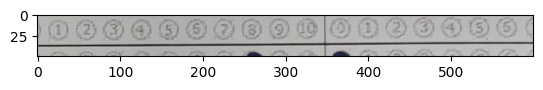

In [25]:
from img2table.document import Image
from img2table.ocr import TesseractOCR
import cv2
from pytesseract import image_to_string
import pytesseract 

# Instantiation of the image
img = Image(src="input/test1.jpg")
image = cv2.imread("input/test1.jpg")
# image = cv2.imread("input/test2.jpg")
# image = image[400:450, 150:500]
image = image[400:450, 1150:1750]

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
tessdata_dir_config = r"--tessdata-dir 'C:\Program Files\Tesseract-OCR\tessdata' -l vie"
text = pytesseract.image_to_string(image, lang='vie', config=tessdata_dir_config)
print("text", text)

# Table identification
image_tables = img.extract_tables()

image_tables
# Draw tables on the image
for table in image_tables:
    print(type(table.bbox))
    print(dir(table.bbox))
    print(dir(img))

    x1 = table.bbox.x1
    x2 = table.bbox.x2
    y1 = table.bbox.y1
    y2 = table.bbox.y2
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with tables drawn
show_image_in_plt(image)

In [32]:
import torch
# from craft_structure.detection import detect, get_detector
from craft import CRAFT

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# craft = get_detector("models/craft_mlt_25k.pth", device)


ModuleNotFoundError: No module named 'craft'